# VaR

## Calculating Daily VaR of Tesla Equity Share with One year historical data

In [78]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use("bmh")
%config InlineBackend.figure_formats=["png"]
     

In [79]:
pip install yahoofinancials

Note: you may need to restart the kernel to use updated packages.


In [80]:
from yahoofinancials import YahooFinancials
from datetime import datetime

In [84]:
json = YahooFinancials('TSLA').get_historical_price_data("2022-01-01", "2023-01-01", "daily")

In [85]:
df = pd.DataFrame(columns=["open","close","adjclose"],dtype=float)

In [86]:
for row in json['TSLA']["prices"]:
        date = datetime.fromisoformat(row["formatted_date"])
        df.loc[date] = [row["open"], row["close"], row["adjclose"]]
df.index.name = "date"

In [87]:
df.head()

,open,close,adjclose
date,,,
2022-01-03,382.583344,399.926666,399.926666
2022-01-04,396.516663,383.196655,383.196655
2022-01-05,382.216675,362.706665,362.706665
2022-01-06,359.000000,354.899994,354.899994
2022-01-07,360.123322,342.320007,342.320007


In [88]:
df['returns']=df['adjclose'].pct_change()
df.head()

,open,close,adjclose,returns
date,,,,
2022-01-03,382.583344,399.926666,399.926666,NaN
2022-01-04,396.516663,383.196655,383.196655,-0.041833
2022-01-05,382.216675,362.706665,362.706665,-0.053471
2022-01-06,359.000000,354.899994,354.899994,-0.021523
2022-01-07,360.123322,342.320007,342.320007,-0.035447


<Axes: xlabel='date'>

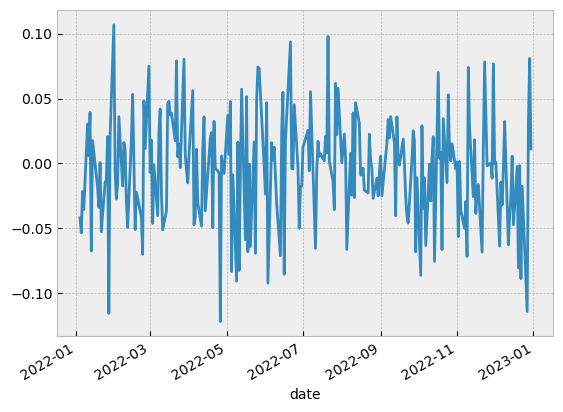

In [89]:
df['returns'].plot()

In [90]:
import seaborn as sns

## Historical method

/var/folders/w6/74cfcntj5pdb23tt1nlz5tkh0000gn/T/ipykernel_9195/2266804704.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['returns'],hist=True,


<Axes: xlabel='returns', ylabel='Density'>

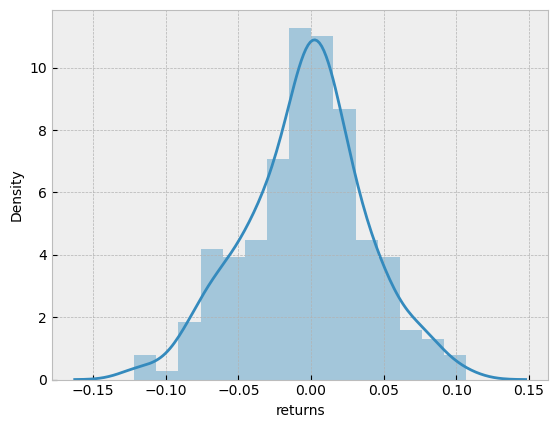

In [91]:
sns.distplot(df['returns'],hist=True,
    kde=True)

In [92]:
var=df['returns'].quantile(0.01)*100
print('VAR at 99% is: ',var,'%')     

VAR at 99% is:  -10.336001593414336 %


## Variance-Covariance method

In [93]:
m=df['returns'].mean()
m

-0.0038474981744944904

In [94]:
std_dev=df['returns'].std()

In [95]:
from scipy.stats import norm


In [96]:
VaR_90 = norm.ppf(1-0.9, m, std_dev)
VaR_95 = norm.ppf(1-0.95, m, std_dev)
VaR_99 = norm.ppf(1-0.99, m, std_dev)


In [97]:
print('VaR at 90% CI: ',VaR_90*100,'%')
print('VaR at 95% CI: ',VaR_95*100,'%')
print('VaR at 99% CI: ',VaR_99*100,'%')


VaR at 90% CI:  -5.659031948552138 %
VaR at 95% CI:  -7.154217645474725 %
VaR at 99% CI:  -9.958937351267668 %


## MonteCarlo Simulation with 99% Confidence Interval 

In [98]:
df.iloc[-1]

open        119.949997
close       123.180000
adjclose    123.180000
returns       0.011164
Name: 2022-12-30 00:00:00, dtype: float64

MonteCarlo VAR at 99% Confidence Interval is:  -9.766553611421642 %


/var/folders/w6/74cfcntj5pdb23tt1nlz5tkh0000gn/T/ipykernel_9195/754072536.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(M_C,hist=True,kde=True)


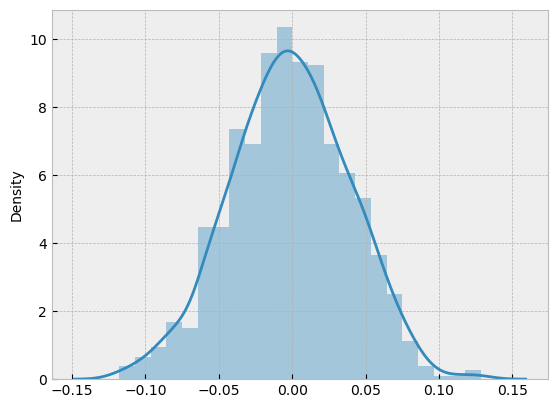

In [99]:
M_C=[]
for i in range(1000):
    daily=np.random.normal(m,std_dev,len(df))
    
   
    M_C.append(daily[-1])
sns.distplot(M_C,hist=True,kde=True)
VaR_mc=(np.percentile(M_C,1))*100
print('MonteCarlo VAR at 99% Confidence Interval is: ',VaR_mc,'%')